## تکنیک های ساده برای رسم نمودار و مصور سازی دیتا در پایتون روی دیتاست واقعی 

## خارج از آموزش و صرفاً برای یادگیری بیشتر 

روش های نصب کتابخانه seaborn

In [2]:
#pip install seaborn

در محیط های آناکوندا (مثل ژوپیتر نوت بوک) در قسمت آناکوندا پرامپت کد زیر را بنویسید

In [3]:
#conda install -c anaconda seaborn

وارد کردن دیتاست (فصل اول - داده کاوی و یادگیری ماشین با پایتون)

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

dataset = sns.load_dataset('titanic')

dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## رسم نمودار توزیع

میایم از تابع زیر برای رسم نمودار توزیع مقادیر فیچر "فر" از دیتاست استفاده میکنیم

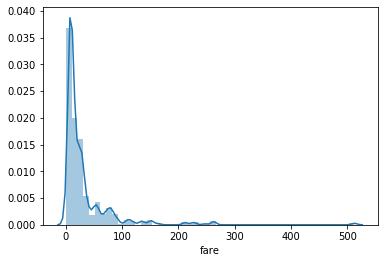

In [5]:
sns.distplot(dataset['fare'])

اگر خواستید نمودار خطی بالا رو بردارید، کافیه براورد چگالی کرنل رو فالس قرار بدید.

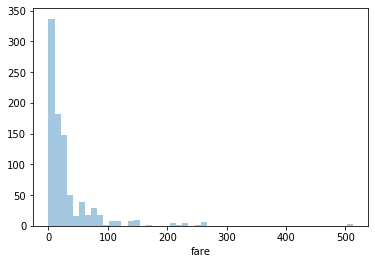

In [6]:
sns.distplot(dataset['fare'], kde=False)

میتونید از تابع باین استفاده کنید که مقادیر رو موقع رسم به دسته بندی کنید. مثلاً به 10 قسمت بخش بندی میکنیم تا جزئیات را کم و بیش مشاهده کینم

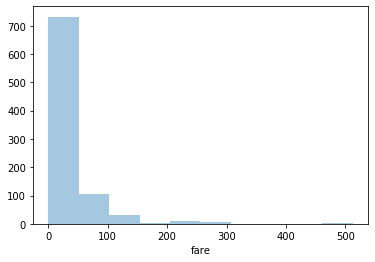

In [7]:
sns.distplot(dataset['fare'], kde=False, bins=10)

# join plot

از این نموداری برای بررسی ارتباط میان فیچرها استفاده میکنیم

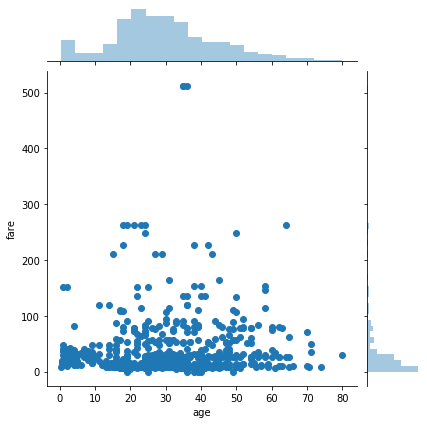

In [8]:
sns.jointplot(x='age', y='fare', data=dataset)

ارتباطی بینشون وجود نداره

# pair plot

اگر دیتای پوچ رو حذف نکنید، هشدار میگیرید

C:\Users\ShahinN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ShahinN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ShahinN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ShahinN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


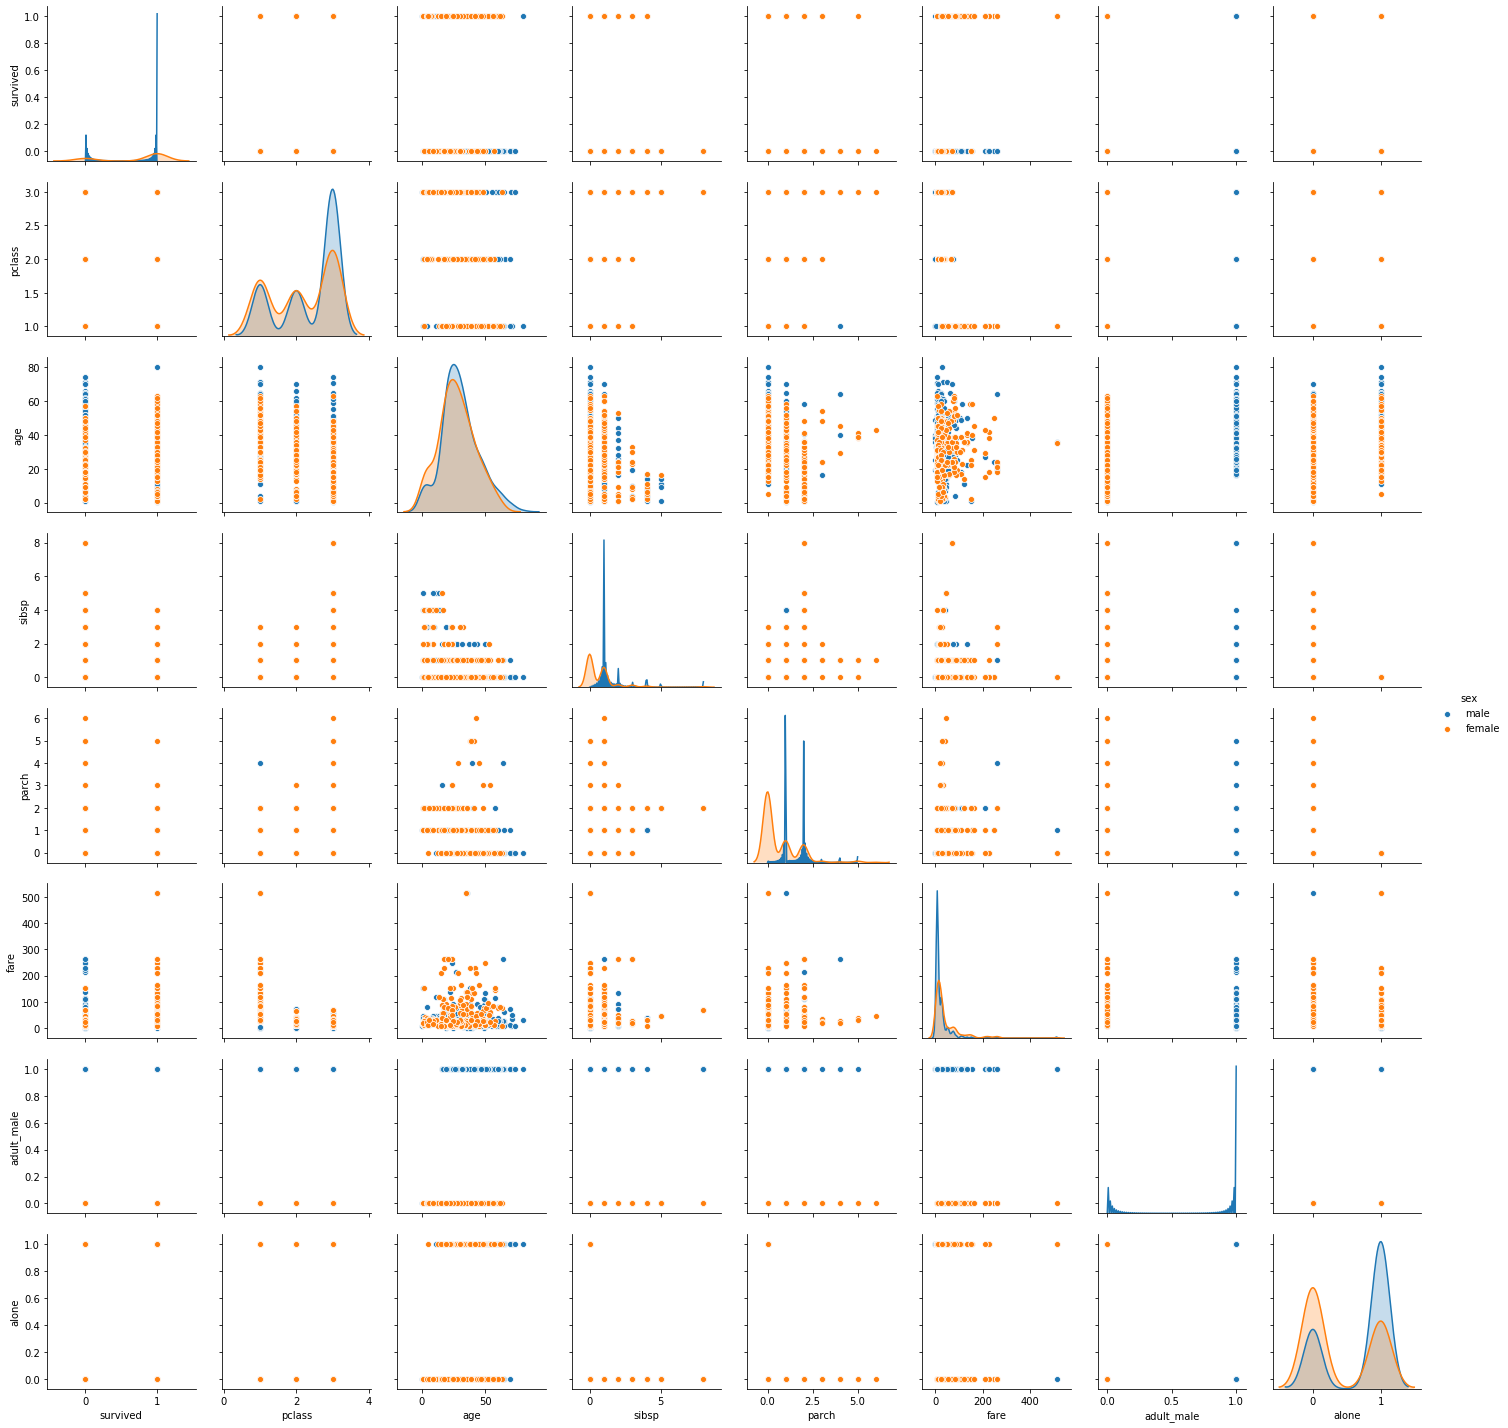

In [9]:
sns.pairplot(dataset, hue='sex')

# همیشه قبل از رسم این نمودار، دیتای پوچ رو حذف کنید

In [10]:
dataset = dataset.dropna()

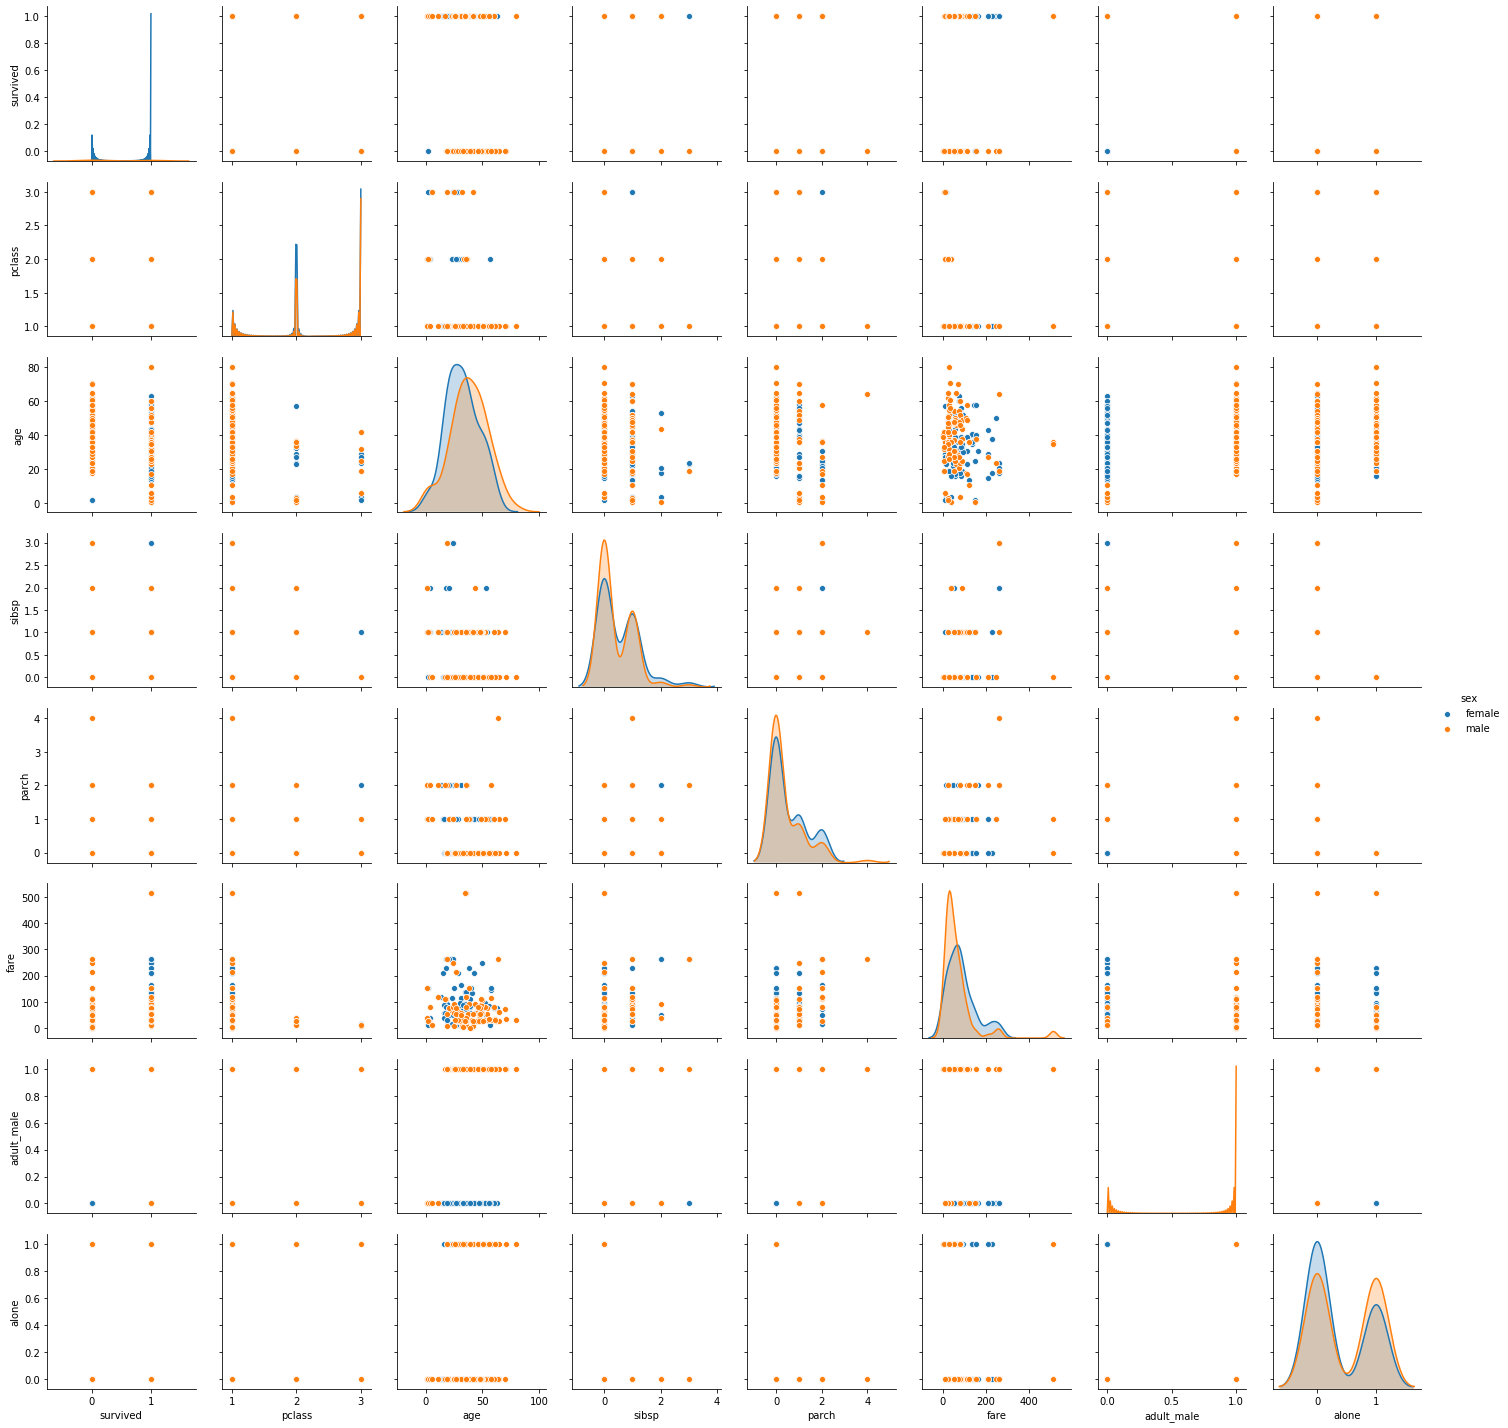

In [11]:
sns.pairplot(dataset, hue='sex')

# نموداری میله ای

مقایسه میانگین سن خانما و آقایون در کشتی تایتانیک

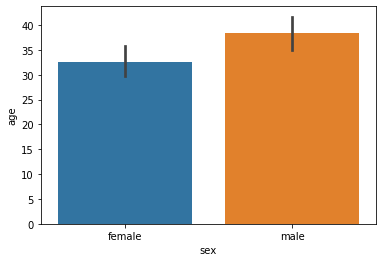

In [12]:
sns.barplot(x='sex', y='age', data=dataset)

مثلاً اگر بخواهیم بدونیم سن خانما به هم نزدیکتره و یا آقایون، میایم از انحراف استاندارد استفاده میکنیم

رسم نمودار با matplotlib (فصل اول)
کار با کتابخونه Numpy (فصل اول)
تحلیل آماری در پایتون (فصل اول)

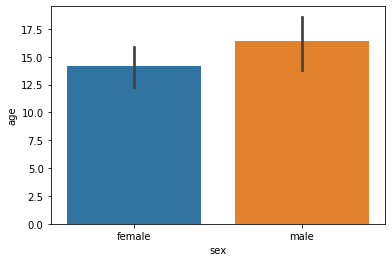

In [14]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='sex', y='age', data=dataset, estimator=np.std)

خانما سنشون به هم نزدیکتره

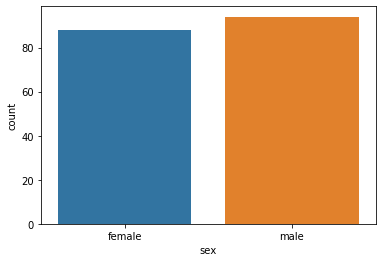

In [15]:
sns.countplot(x='sex', data=dataset)

تعداد آقایون بیشتره

# نمودار جعبه ای

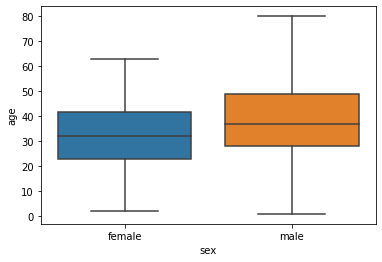

In [16]:
sns.boxplot(x='sex', y='age', data=dataset)

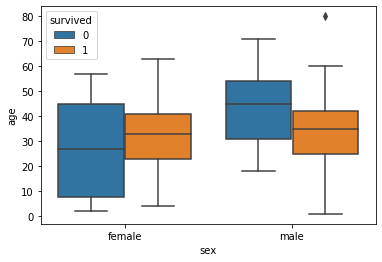

In [17]:
sns.boxplot(x='sex', y='age', data=dataset, hue="survived")

# ماتریس همبتسگی

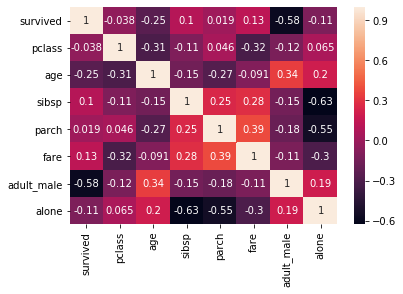

In [18]:
sns.heatmap(dataset.corr(), annot=True)

اگه دوست داشتین، میتونین رنگشم عوض کنین
cmap یعنی colormap

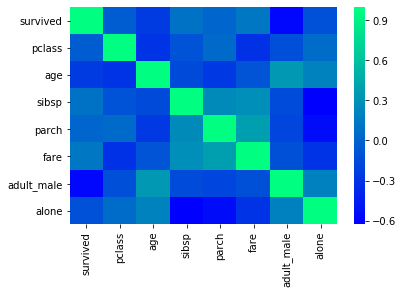

In [19]:
sns.heatmap(dataset.corr(), cmap='winter')

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

dataset = sns.load_dataset('flights')

dataset.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


تحلیل آماری در پایتون فصل اول

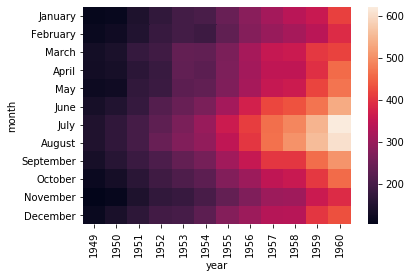

In [21]:
data = dataset.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(data)

سال 1956 به بعد تعداد مسافران بیشتر شدند. تو ماه جولای و آگوست تعداد مسافران از بقیه بیشتره

# Cluster map
نقشه خوشه بندی

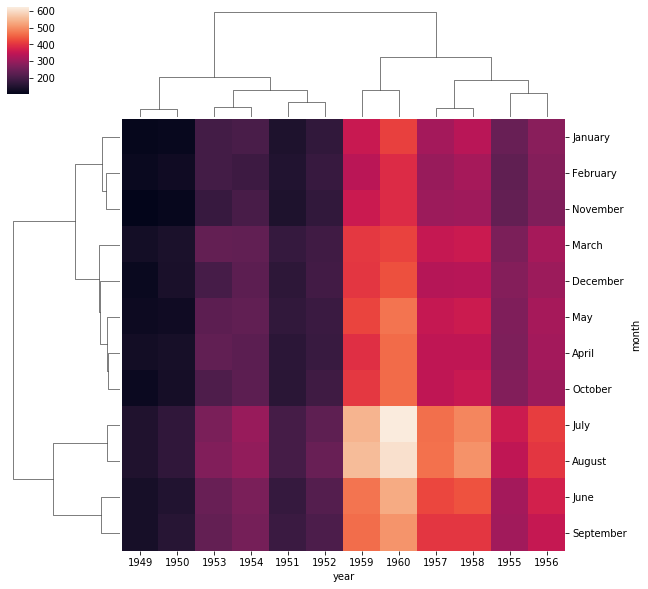

In [23]:
data = dataset.pivot_table(index='month', columns='year', values='passengers')
sns.clustermap(data)